In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import colors

import plot_PLSC as vpp

import os.path as op

import importlib

In [2]:
importlib.reload(vpp)

path_to_repository = "../../"

path_to_atlas = op.join(path_to_repository, "data/parcellation")
path_to_pls_results = op.join(path_to_repository, "outputs/PLS_results")
path_to_results = op.join(path_to_repository, "outputs")

results_study = 'Figures'

# Specify the id of the PLS latent component (0 for latent component 1, etc)
LC_id = 0

# Specify the name of the folder with PLSC results
study = "Emo-COVID-wcov3-wmemo1_GRP"

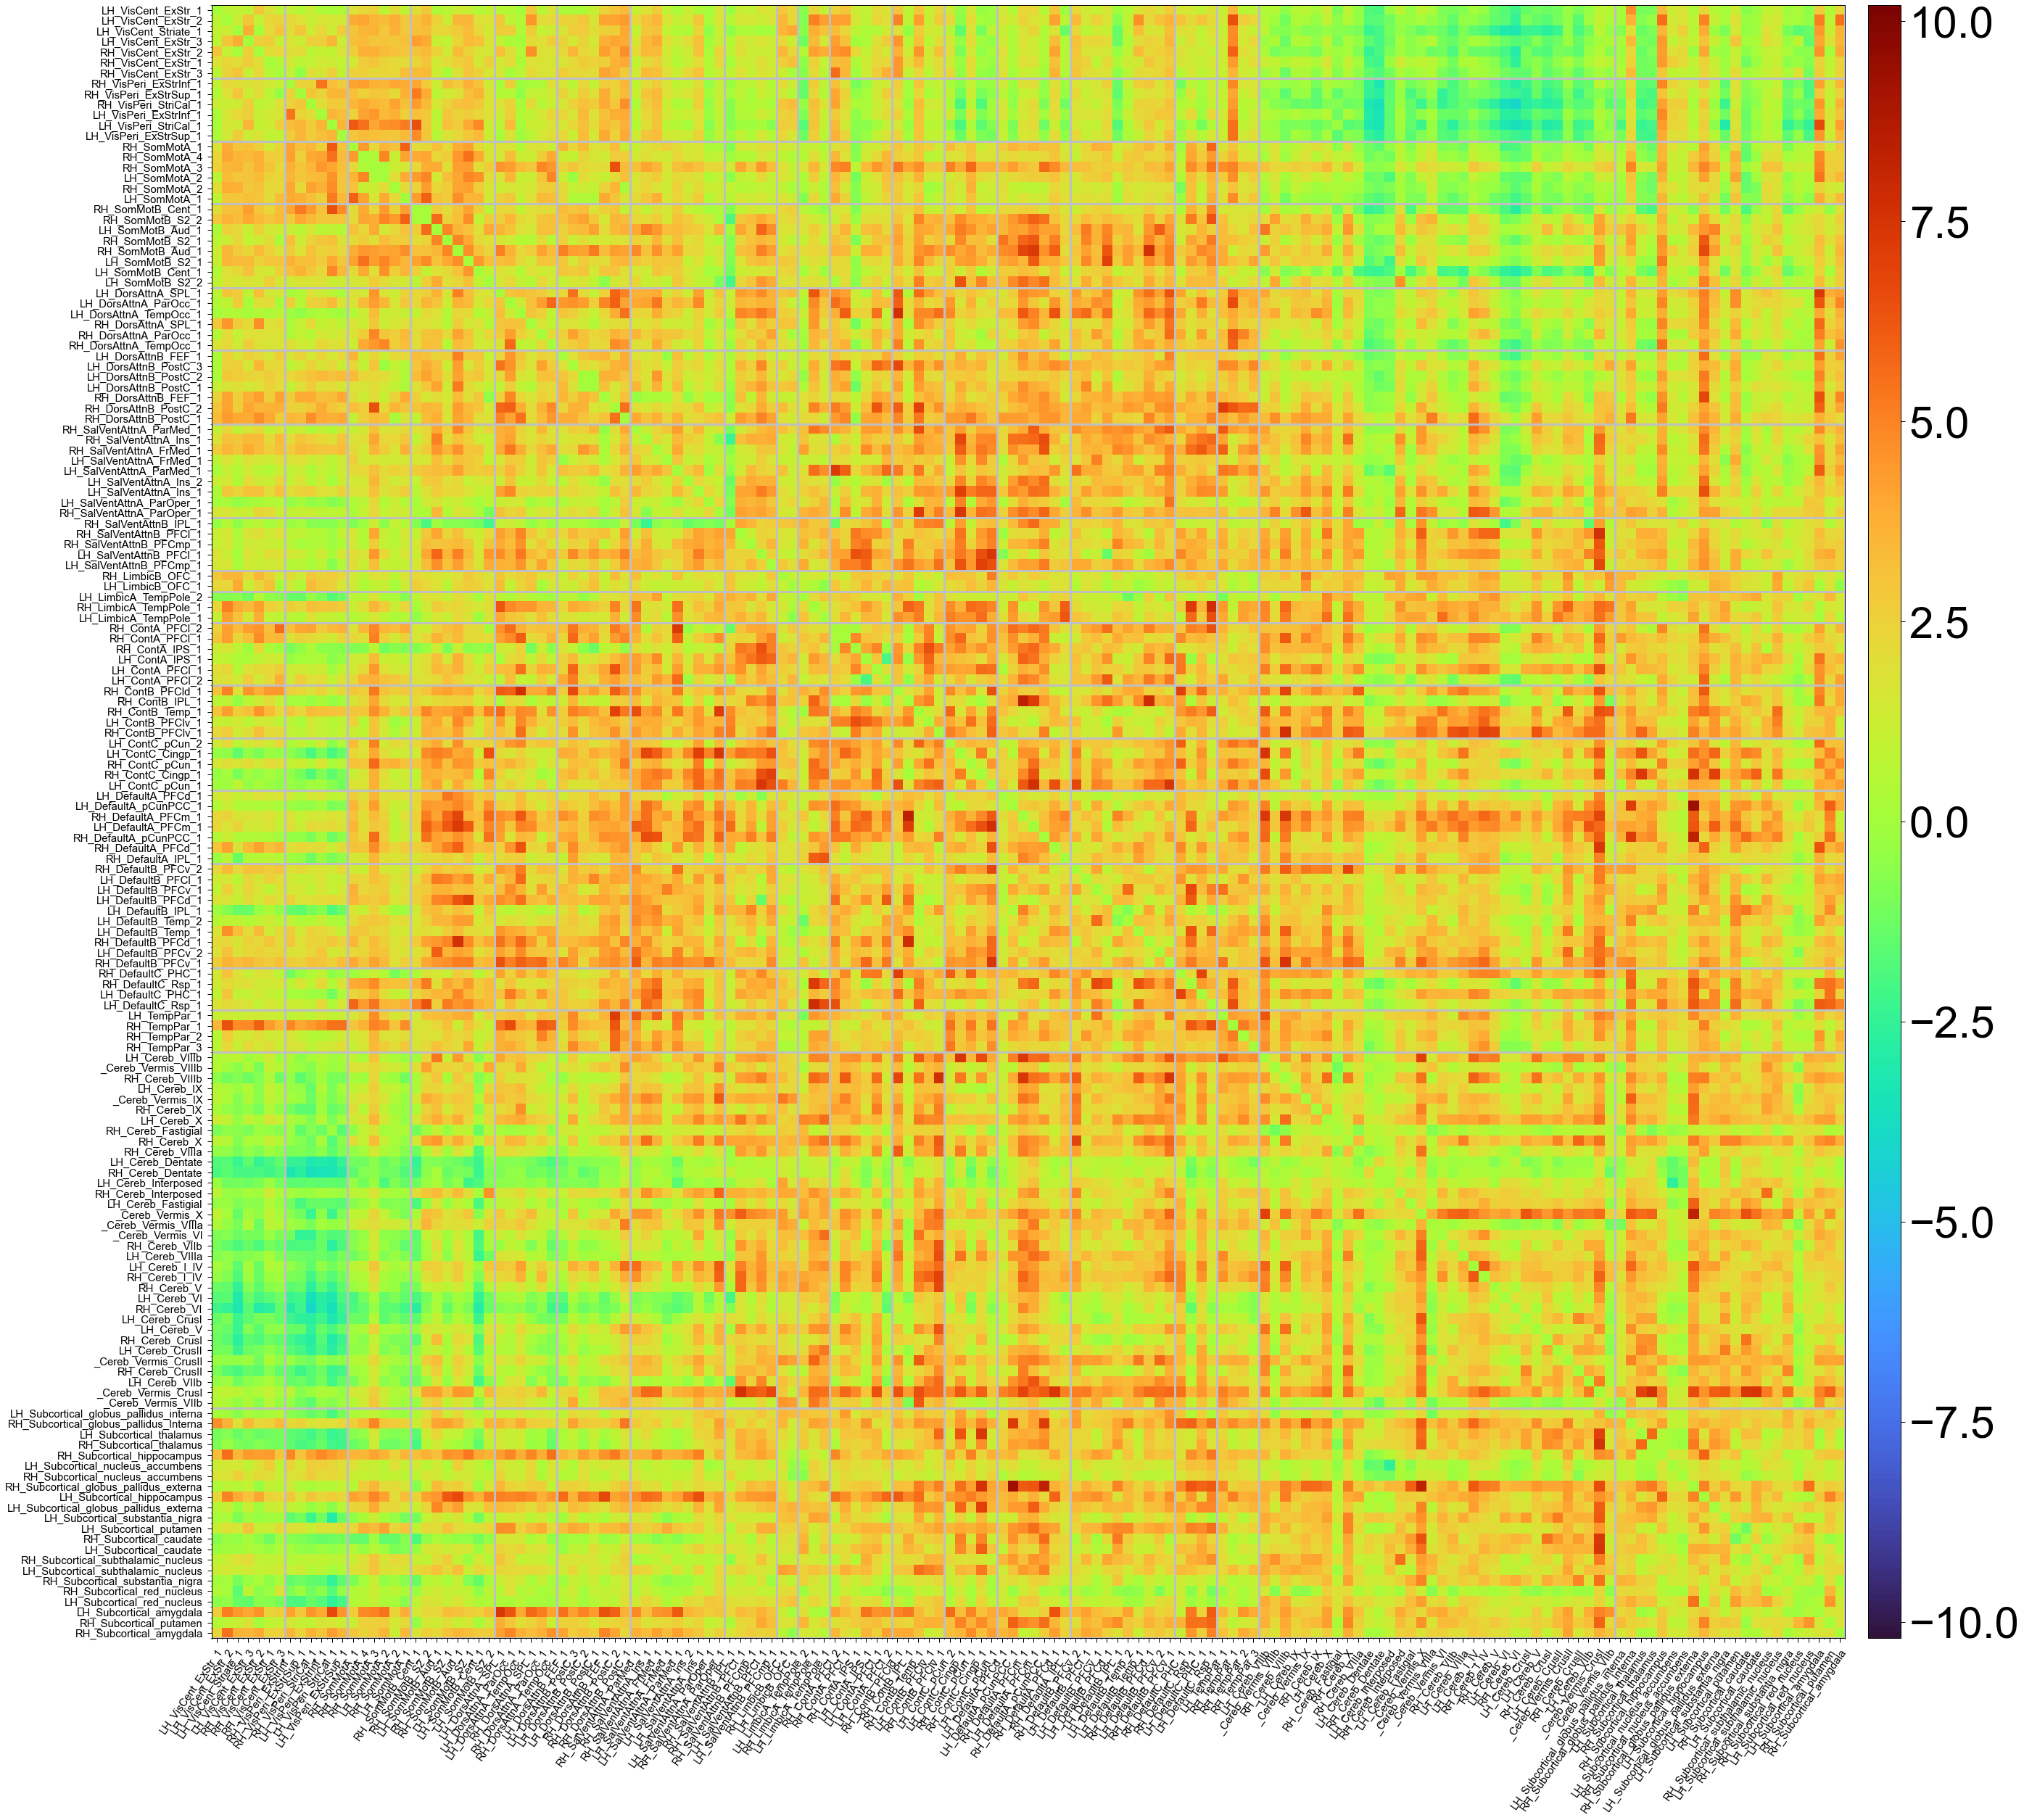

In [3]:
importlib.reload(vpp)
to_plot, atlas_labels = vpp.plot_imaging(study, path_to_pls_results, path_to_atlas=path_to_atlas,
                                         LC_id=LC_id, threshold=0, by_network=True, cmap='turbo')

plt.savefig(op.join(path_to_results, results_study, f'{study}-ImgBSR_Heatmap.png'))

In [4]:
def bootstrap_percentile(data, n=10000, perc=95, ci=95):
    resample = np.random.choice(data, size=(data.shape[0], n), replace=True)
    percentile = np.percentile(resample, q=perc, axis=1, method='nearest')
    conf_intervals = np.percentile(percentile, q=[100-ci, ci], method='nearest')
    return percentile.mean(), conf_intervals

In [5]:
to_circus = to_plot.copy()
atlas_to_circus = atlas_labels.copy()

perc_thresh = 1

mythresh = 3
num_val = 1000

if perc_thresh:
    triu_idx = np.triu_indices_from(to_plot, k=1)
    lined = to_plot[triu_idx]
    percentile_thresh, ci = bootstrap_percentile(lined[lined > 0], perc=(100 - perc_thresh))
    to_circus[(to_circus < percentile_thresh) & (to_circus > 0)] = 0
    
    percentile_thresh, ci = bootstrap_percentile(lined[lined < 0], perc=perc_thresh)
    to_circus[(to_circus > percentile_thresh) & (to_circus < 0)] = 0
else:
    to_circus[np.abs(to_circus) < mythresh] = 0

In [6]:
ASCEND = False

stronger_fc = vpp.get_stronger_fc(to_circus, atlas_labels, n_val=num_val, use_abs=True, ascending=ASCEND)

stronger_fc.head(20)

,net_from,reg_from,net_to,reg_to,score
93,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,9.275805
100,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,8.344844
70,ContB,IPL_1,DefaultA,PFCm_1,8.338094
114,Cereb,Vermis_X,Subcortical,globus_pallidus_externa,8.299522
72,ContB,IPL_1,DefaultB,PFCd_1,7.791198
60,LimbicA,TempPole_1,DefaultC,Rsp_1,7.74015
30,DorsAttnA,TempOcc_1,ContB,PFCld_1,7.714381
88,ContC,pCun_1,DefaultA,PFCm_1,7.693945
74,ContB,PFClv_1,Cereb,VIIIb,7.690086
50,SalVentAttnB,PFCl_1,Cereb,Vermis_CrusI,7.628385


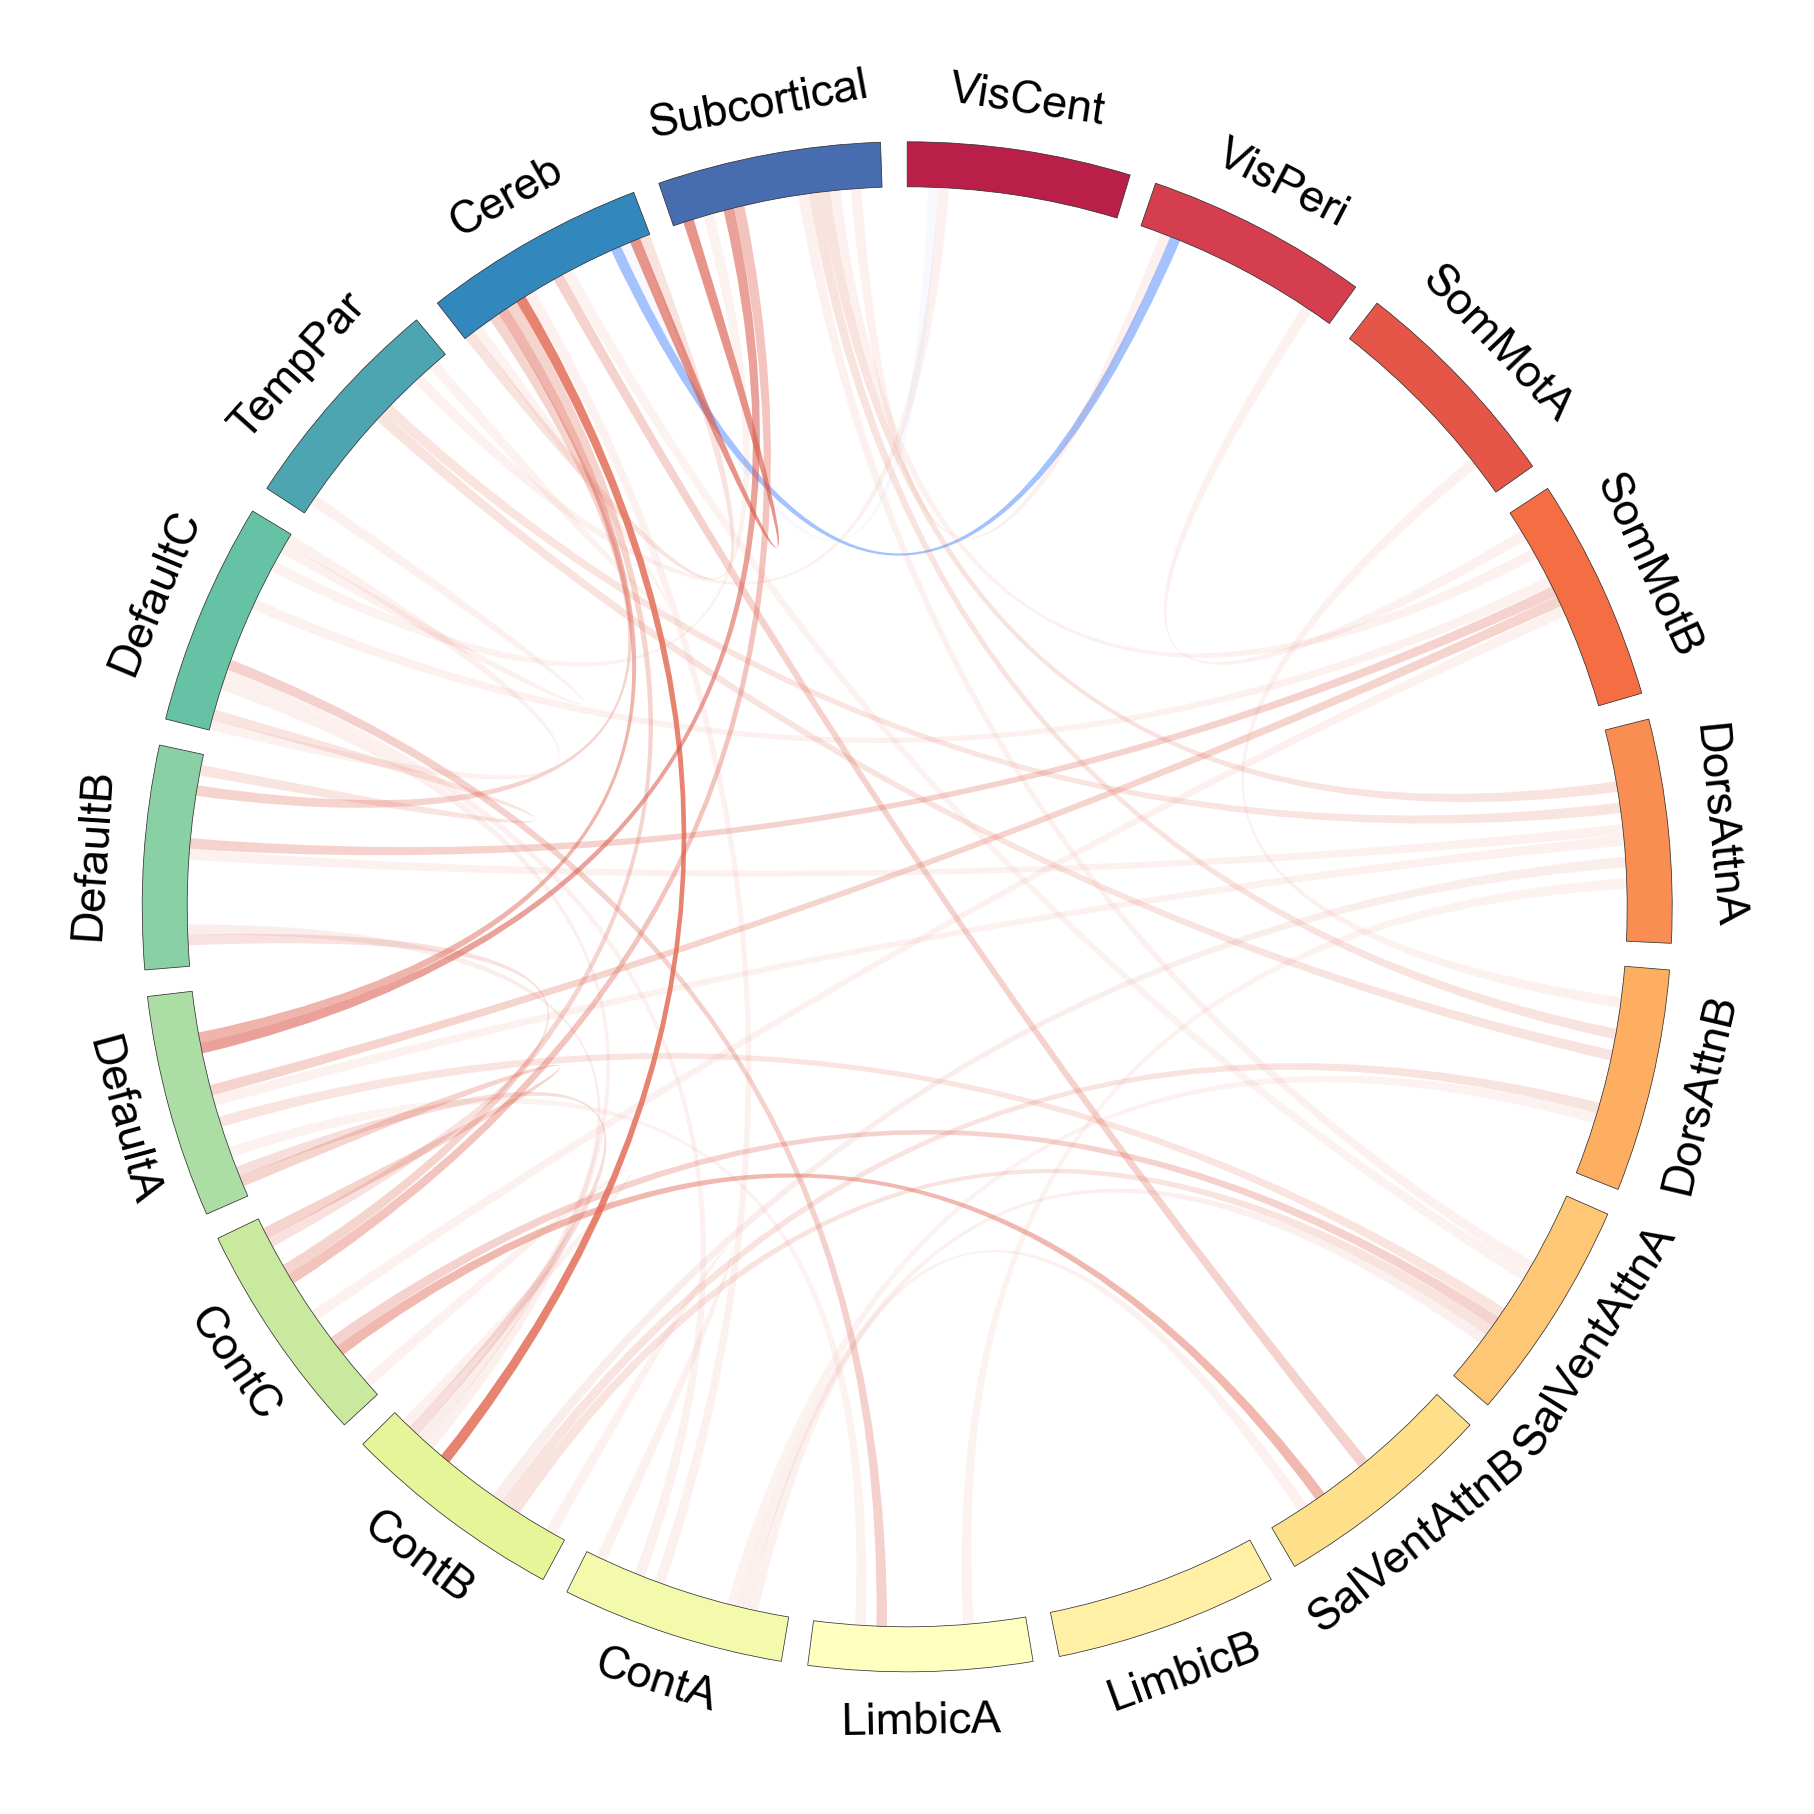

In [7]:
vpp.plot_circus(to_circus, atlas_to_circus, figsize=(25, 25), net_visualize=True, label_size=45)

stronger_fc.to_csv(op.join(path_to_results, results_study, f'{study}_stronger_fc'+ASCEND*'_NEG'+'.csv'))
plt.savefig(op.join(path_to_results, results_study, f'{study}-ImgBSR_Circus-perc{perc_thresh}.png'), dpi=300)

c:\Users\cioncaa\Miniconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\cioncaa\Miniconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


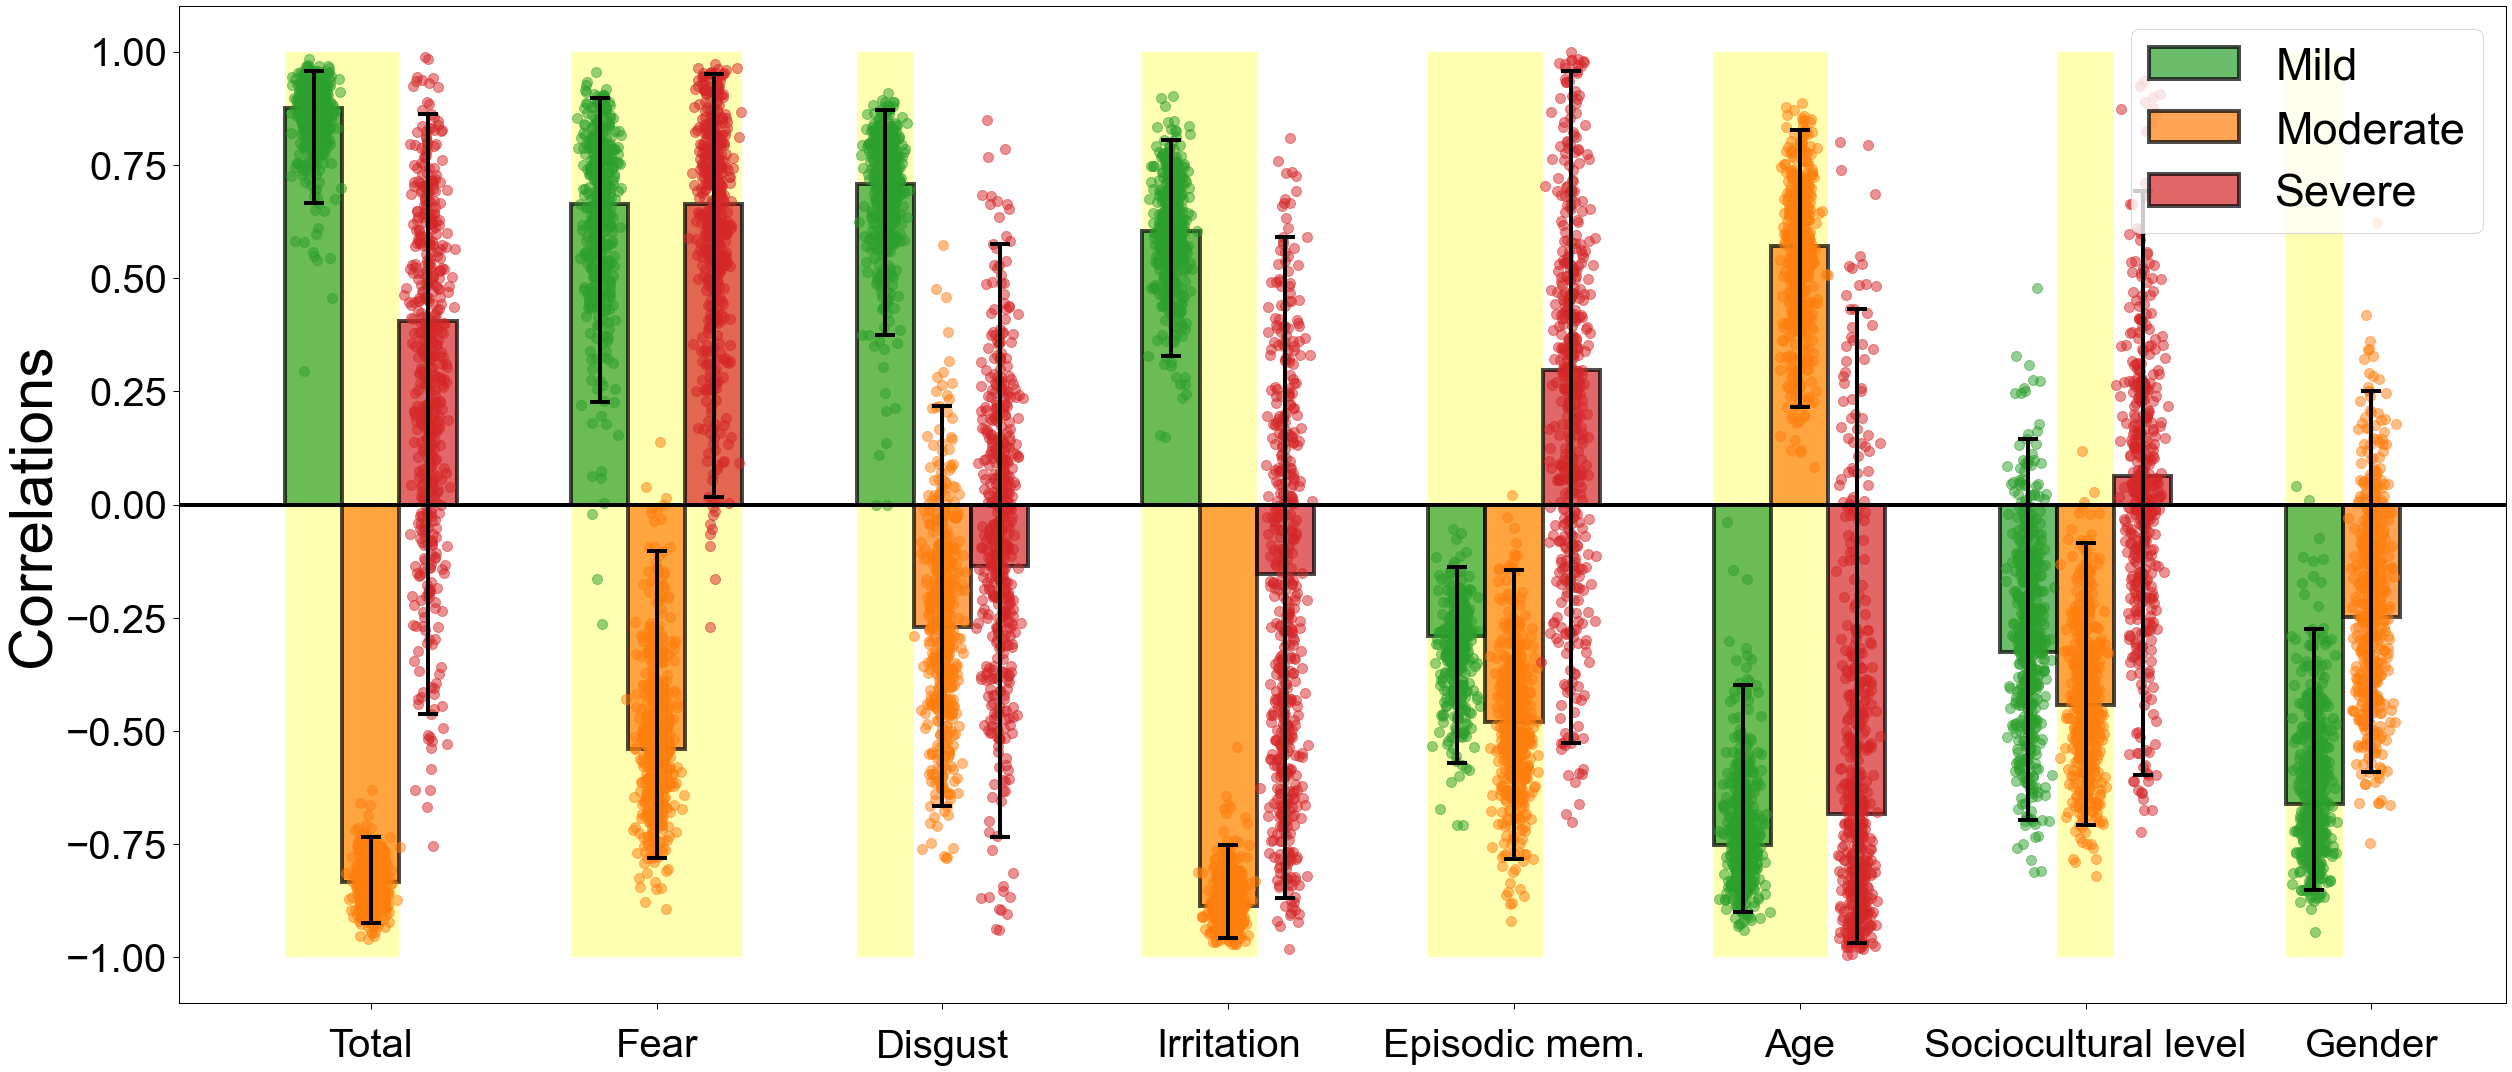

In [8]:
imaging = False

plsc_groups = ['Mild', 'Moderate', 'Severe']
plsc_colors = ['tab:green', 'tab:orange', 'tab:red']

plsc_labels = ['Total', 'Fear', 'Disgust', 'Irritation', 'Episodic mem.', 'Age', 'Sociocultural level', 'Gender']

save_suffix = 'Behav'

vpp.plot_behaviour(study, path_to_pls_results, LC_id=LC_id, labels=plsc_labels, groups=plsc_groups, colors=plsc_colors, figsize=(35, 15), imaging=imaging)

plt.savefig(op.join(path_to_results, results_study, f'{study}-{save_suffix}Loadings.png'), dpi=300)